### ДЗ №1 по ML предсказать параметр MEDV из данного датасета (housing.csv):
#### 1 - модель линейной регрессии
#### 2 - разбить train/test на 0.8/0.2

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.metrics import mean_squared_error
from math import sqrt

In [20]:
housing = pd.read_csv('housing.csv')

In [36]:
housing.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


### Смотрим dataset

In [12]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [23]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Обучаем модель

In [24]:
x = housing.drop('MEDV', axis = 1)
y = housing['MEDV']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 793, shuffle = True)
print('Обучающая часть-', X_train.shape)
print('Для тестирования-', X_test.shape)

Обучающая часть- (404, 13)
Для тестирования- (102, 13)


### Ошибка на линейной регрессии

In [15]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
pred = model_lr.predict(X_test)

print('Ошибка MSE = ', mean_squared_error(y_test, pred, squared = True))
print('Ошибка RMSE = ', sqrt(mean_squared_error(y_test,pred, squared = True)))

Ошибка MSE =  19.95096598406376
Ошибка RMSE =  4.466650421072122


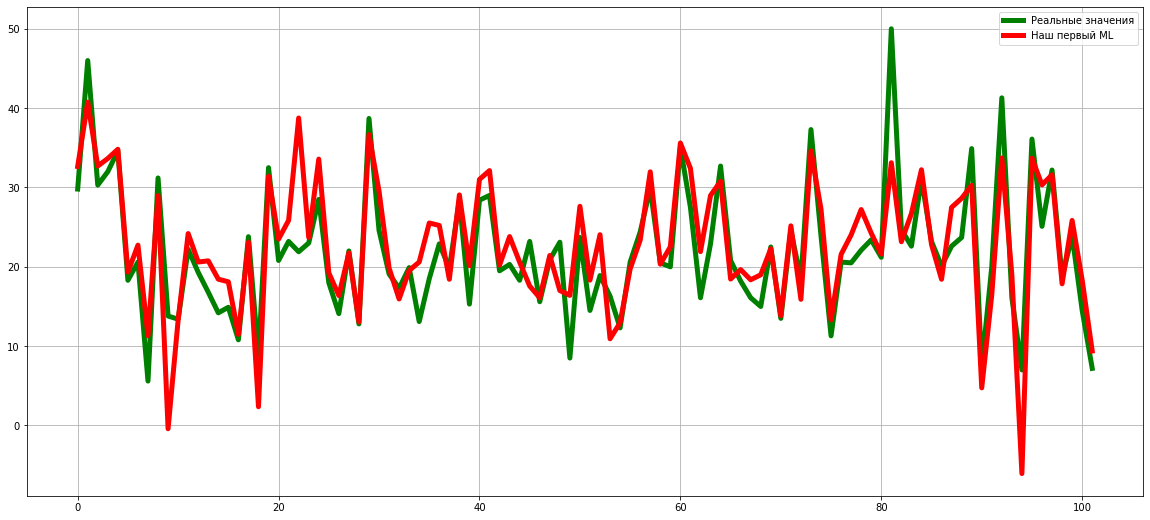

In [27]:
plt.figure(figsize = (20,9))
plt.plot(y_test.values, "green", linewidth = 5, label = 'Реальные значения')
plt.plot(pred, "red", linewidth = 5, label = 'Наш первый ML')
plt.legend(loc = 'best')
plt.grid(True)
plt.show()

### Решающие деревья для задачи регрессии.
#### Метод деревьев выдает незначительное улучшение по оишибке (0,0449 пункта)

In [28]:
tree_regressor = tree.DecisionTreeRegressor()
tree_regressor.fit(X_train,y_train)
tree_pred = tree_regressor.predict(X_test)

print('Ошибка MSE DecisionTreeRegressor = ', mean_squared_error(y_test, tree_pred))
print('Ошибка RMSE DecisionTreeRegressor = ',sqrt(mean_squared_error(y_test, tree_pred)))

Ошибка MSE DecisionTreeRegressor =  19.55107843137255
Ошибка RMSE DecisionTreeRegressor =  4.421660144263979


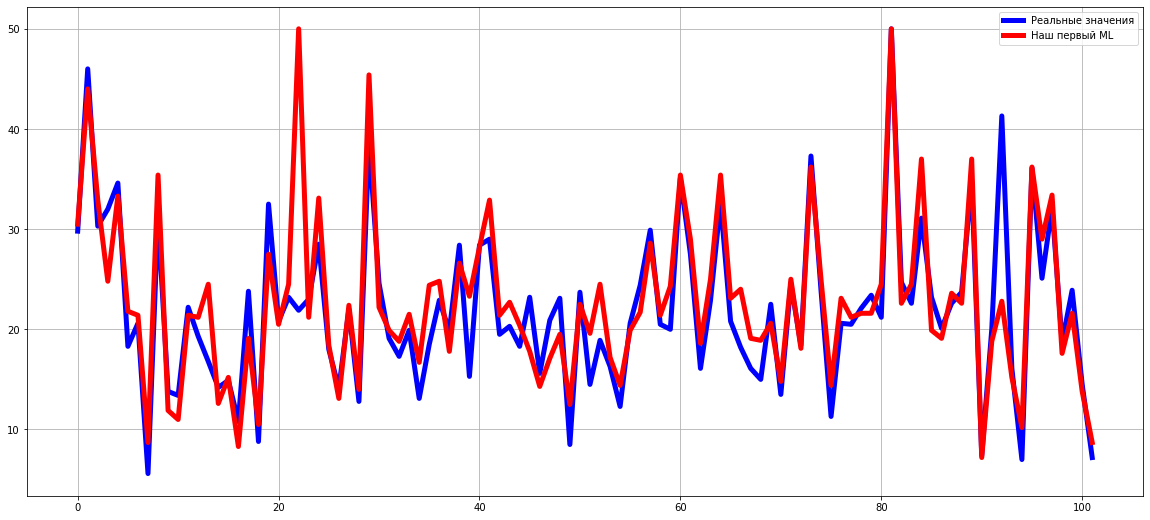

In [35]:
plt.figure(figsize = (20,9))
plt.plot(y_test.values, "blue", linewidth = 5, label = 'Реальные значения')
plt.plot(tree_pred, "red", linewidth = 5, label = 'Наш первый ML')
plt.legend(loc = 'best')
plt.grid(True)
plt.show()

In [30]:
frame = {'Важность параметров':tree_regressor.feature_importances_ , 'Параметры':X_train.columns}
result = pd.DataFrame(frame)
result.sort_values(by = 'Важность параметров', ascending = False)

,Важность параметров,Параметры
5,0.617284,RM
12,0.198314,LSTAT
7,0.065127,DIS
4,0.049680,NOX
0,0.021290,CRIM
11,0.018541,B
9,0.008561,TAX
10,0.007699,PTRATIO
2,0.004104,INDUS
6,0.003780,AGE
